In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

In [2]:
# Load data

df = pd.read_csv('ex2data1.txt', header=None, names=['Exam1_Score', 'Exam2_Score', 'Admit_Status'])
df.head()

,Exam1_Score,Exam2_Score,Admit_Status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam1_Score     100 non-null float64
Exam2_Score     100 non-null float64
Admit_Status    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [4]:
# Create feature matrix X and vector y
X = df[['Exam1_Score','Exam2_Score']]
y = df['Admit_Status']

In [5]:
# In vector y, Make 1 'pos' and 0 'neg'

y.replace({1: 'Admitted', 0: 'Not admitted'}, inplace=True)

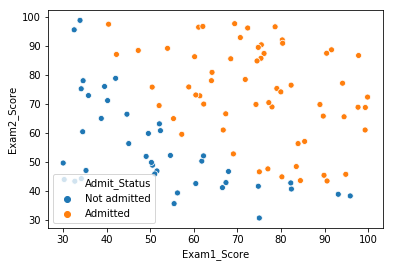

In [6]:
# Plot X against y showing different admit status

sns.scatterplot(x='Exam1_Score', y='Exam2_Score', data=df, hue='Admit_Status')


## Warm up Exercise

#### Sigmoid function

In [7]:
# Create a sigmoid function

def sigmoid(z):
    
    g = 1/ (1 + np.exp(-z))
    
    return g

In [8]:

z = 0
sigmoid(z)

0.5

#### Cost function and gradient for logistic regression

In [9]:
# Create a cost function

# Firstly, Transform X and y from dataframe and series to arrays

X = X.values
y = y.replace({'Admitted': 1, 'Not admitted': 0}).values

# Extract variables m(training examples) and n(number of features) from X array

m, n = X.shape

# Add intercept term of ones to variable X

X = np.concatenate((np.ones((m,1)), X), axis=1)

In [10]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
# define cost function

def costFunction(theta, X, y):

    h = sigmoid(np.dot(X, theta.T))
    J = (1/m) * (np.dot(-y, np.log(h)) - (np.dot((1-y), np.log(1-h)))) # Cost function
    grad = (1/m) * np.dot(X.T, (h-y))
    
    
    return J, grad

In [17]:
# Initialize the parameter theta
theta = np.zeros(n+1)    # length of vector is n+1(Including the intercept term)

costFunction(theta, X, y)

(0.6931471805599453, array([ -0.1       , -12.00921659, -11.26284221]))

#### Minimizing the cost function 

In [18]:
y.shape

(100,)

In [19]:
res = minimize(costFunction, theta, (X, y), jac=True, method='TNC', options={'maxiter': 400})
cost = res.fun
theta = res.x

In [20]:
cost

0.20349770158947472

In [25]:
theta

array([-25.1613186 ,   0.20623159,   0.20147149])

#### Prediction

In [26]:
def predict(theta, X):
    
    threshold = 0.5
    p = sigmoid(np.dot(X, theta.T)) >= threshold
    
    return p.astype('int')

In [27]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2
print(predict(theta, np.array([1, 45, 85]))) # predicting admission status with 1 meaning admitted and 0 for not admitted
print(sigmoid(np.dot(np.array([1, 45, 85]), theta))) # calculate actual probability of getting admitted based on the given input

1
0.7762906233213765


In [28]:
# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

Train Accuracy: 89.00 %


#### Decision boundary

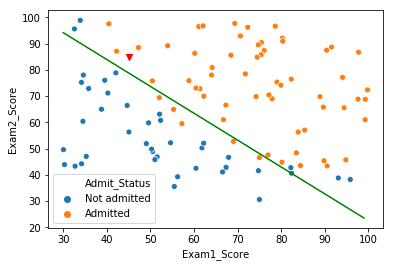

In [29]:
# Plot scatterplot of the exam score 1 and 2 based on admission status

sns.scatterplot(x='Exam1_Score', y='Exam2_Score', data=df, hue='Admit_Status')

# To get boundary line, product of theta.T and X is equated to zero and the corresponding value for
# exam score 1 and 2 are obtained


# let x = exam score 1 value and y = exam score 2 value
x = np.arange(30, 100) # Range of values for exam score 1 
y = -(1/theta[2]) * ((theta[1] * x) + theta[0]) # Equation relating exam score 1 and 2
plt.plot(x,y, color="green")
plt.scatter(45, 85, color="red", marker="v")

## Regularised Logistic Regression

In [30]:
# Load in data
df2 = pd.read_csv('ex2data2.txt', header=None, names=["Microchip_Test1", "Microchip_Test2", "Quality_Status"])
df2.head()

,Microchip_Test1,Microchip_Test2,Quality_Status
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


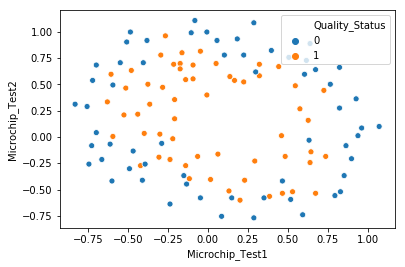

In [31]:
sns.scatterplot(x='Microchip_Test1', y='Microchip_Test2', data=df2, hue='Quality_Status')

In [32]:
X = df2[['Microchip_Test1','Microchip_Test2']].values
y = df2['Quality_Status'].values

In [33]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
poly = PolynomialFeatures(6)
X = poly.fit_transform(X)
X.shape

(118, 28)

#### Regularized cost function and gradient

In [34]:
def costFunctionReg(theta, X, y, lambda_):
    m = len(y)
    grad = np.zeros(X.shape[1])
    h = sigmoid(np.dot(X, theta.T))
    J = ((1/m) * (np.dot(-y, np.log(h)) - (np.dot((1-y), np.log(1-h))))) + ((lambda_/(2*m)) * np.sum(theta[1:] ** 2))
    grad[0] = (1/m) * np.dot(X[:,0], (h-y))
    grad[1:] = ((1/m) * np.dot(X[:,1:].T, (h-y))) + ((lambda_/m) * theta[1:])
    return J, grad  

In [35]:
theta = np.zeros(X.shape[1])
lambda_ = 1

cost, gradient = costFunctionReg(theta, X, y, lambda_)

In [36]:
gradient

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

# Optional exercise

In [40]:
#fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, lambda_ in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    theta = np.zeros(X.shape[1])
    res = minimize(costFunctionReg, theta, args=(X, y, lambda_), jac=True, method='TNC', options={'maxiter':3000})
    cost = res.fun
    theta = res.x
    # Accuracy
    #p = predict(theta, X)
    #accuracy = np.mean(p == y) * 100    

    # Scatter plot of X,y
    #axes = plt.scatter(x='Microchip_Test1', y='Microchip_Test2', 'y=1', 'y=2')
    
    # Plot decisionboundary
    #x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    #x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    #xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    #h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    #h = h.reshape(xx1.shape)
    #axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    #axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))

In [45]:
theta.shape

(28,)